### Part 1: Gravitational Potential of the Earth

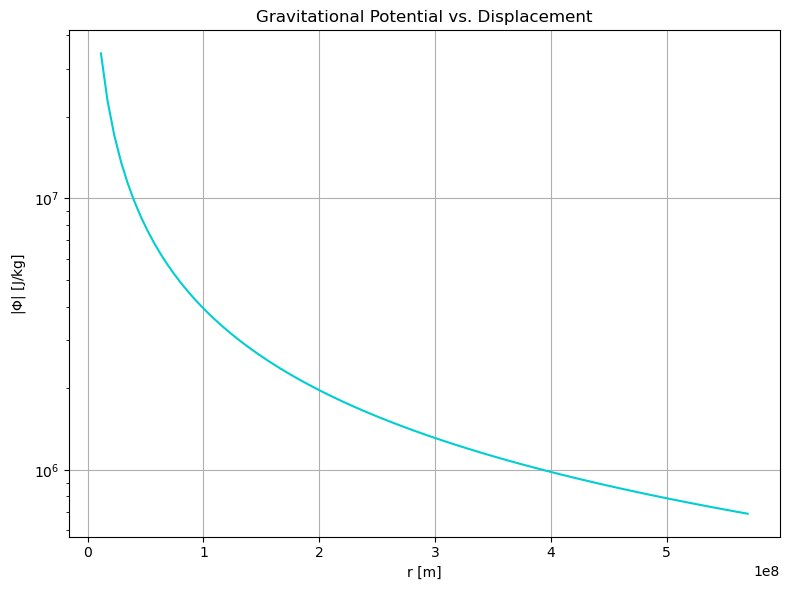

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
import math

G = scipy.constants.G # m^3 kg^-1 s^-2
RE = 6378*10**3 # m
DEM = 3.8*10**8 # m
m_earth = 5.9*10**24 # kg
m_moon = 7.3*10**22 # kg
m_A = 5500 # kg
RM = 1737*10**3 # m
def potential(m, xm, ym, x ,y, R):
    if np.sqrt((x-xm)**2 + (y-ym)**2) < R:
        return np.nan
    else:
        return -(G*m)/np.sqrt((x-xm)**2 + (y-ym)**2)
        
vec_pot = np.vectorize(potential)
xvals = np.linspace(0,1.5*DEM,100)
yvals = np.abs(vec_pot(m_earth,0,0,xvals,0, RE))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(xvals, yvals, color="darkturquoise",label="Potential")
ax.set_yscale("log")
ax.set_xlabel("r [m]")
ax.set_ylabel(r"$\vert \Phi \vert$ [J/kg]")
ax.set_title("Gravitational Potential vs. Displacement")
plt.tight_layout()
ax.grid()

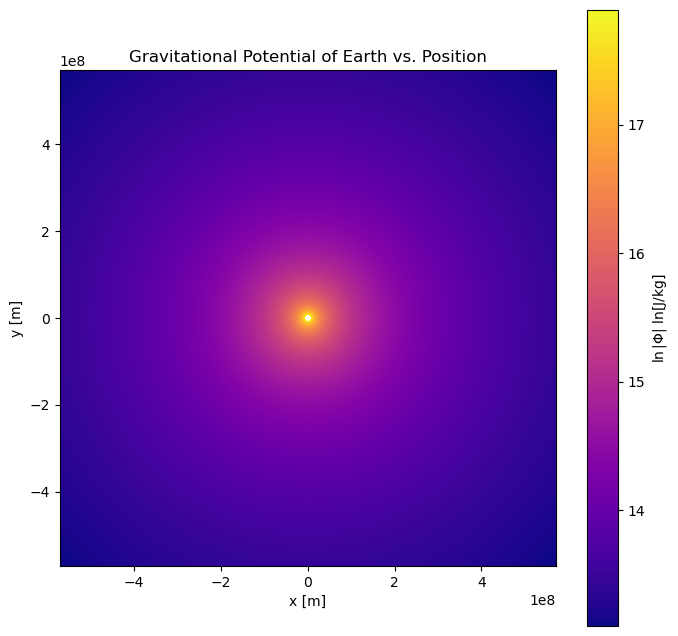

In [6]:
xvals = np.linspace(-1.5*DEM,1.5*DEM,500)
yvals = np.linspace(-1.5*DEM,1.5*DEM,500)
xgrid, ygrid = np.meshgrid(xvals,yvals)
zvals = np.log(np.abs(vec_pot(m_earth,0 ,0, xgrid, ygrid, RE)))

fig, ax = plt.subplots(figsize=(8,8))
mesh = ax.pcolormesh(xgrid,ygrid,zvals,cmap=cm.plasma)
ax.set_aspect("equal")
cbar = fig.colorbar(mesh)
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_title("Gravitational Potential of Earth vs. Position")
cbar.set_label(r"$\ln \vert \Phi \vert$ ln[J/kg]")

### Part 2: Gravitational Potential of the Earth Moon System

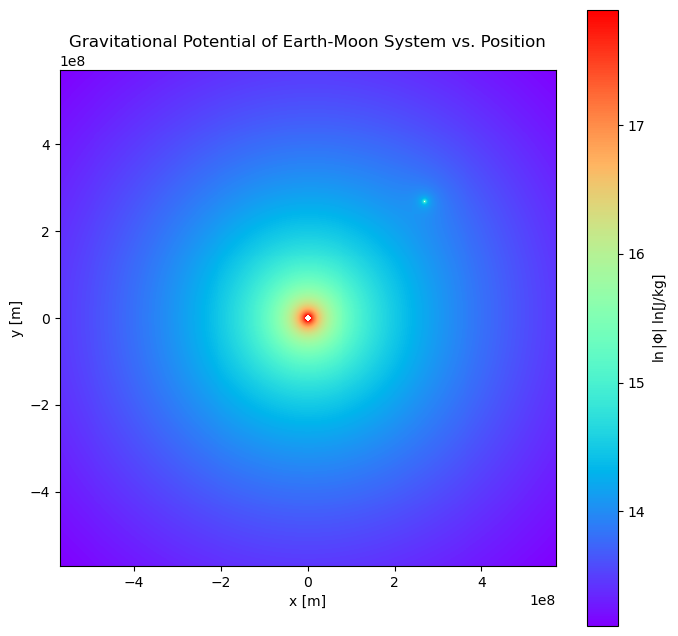

In [7]:
xvals = np.linspace(-1.5*DEM,1.5*DEM,500)
yvals = np.linspace(-1.5*DEM,1.5*DEM,500)
xgrid, ygrid = np.meshgrid(xvals,yvals)
P_earth = np.abs(vec_pot(m_earth,0 ,0, xgrid, ygrid, RE))
P_moon = np.abs(vec_pot(m_moon,DEM/np.sqrt(2),DEM/np.sqrt(2),xgrid,ygrid, RM))
P_net = np.log(P_earth +P_moon)
zvals = P_net

fig, ax = plt.subplots(figsize=(8,8))
mesh = ax.pcolormesh(xgrid,ygrid,zvals,cmap=cm.rainbow)
ax.set_aspect("equal")
cbar = fig.colorbar(mesh)
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_title("Gravitational Potential of Earth-Moon System vs. Position")
cbar.set_label(r"$\ln \vert \Phi \vert$ ln[J/kg]")

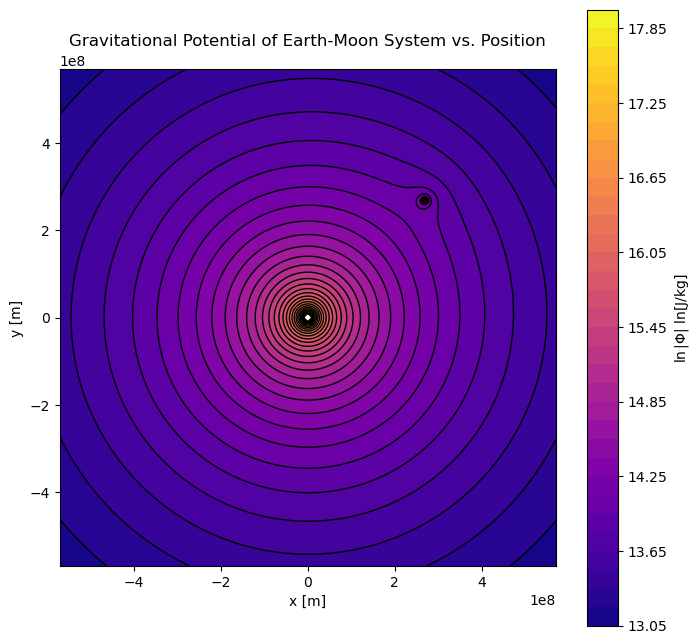

In [8]:
fig_contour, ax_contour = plt.subplots(figsize=(8,8))

lvl = np.logspace(13,18,40)
contour = ax_contour.contourf(xgrid,ygrid,zvals,levels = 40 ,cmap = cm.plasma)
contour2 = ax_contour.contour(xgrid,ygrid,zvals,colors =['black'],linewidths=1, levels = 40)
ax_contour.set_aspect("equal")
cbar2 = fig_contour.colorbar(contour)
ax_contour.set_xlabel("x [m]")
ax_contour.set_ylabel("y [m]")
ax_contour.set_title("Gravitational Potential of Earth-Moon System vs. Position")
cbar2.set_label(r"$\ln \vert \Phi \vert$ ln[J/kg]")

### Part 3: Gravitational Force Field of the Earth-Moon System

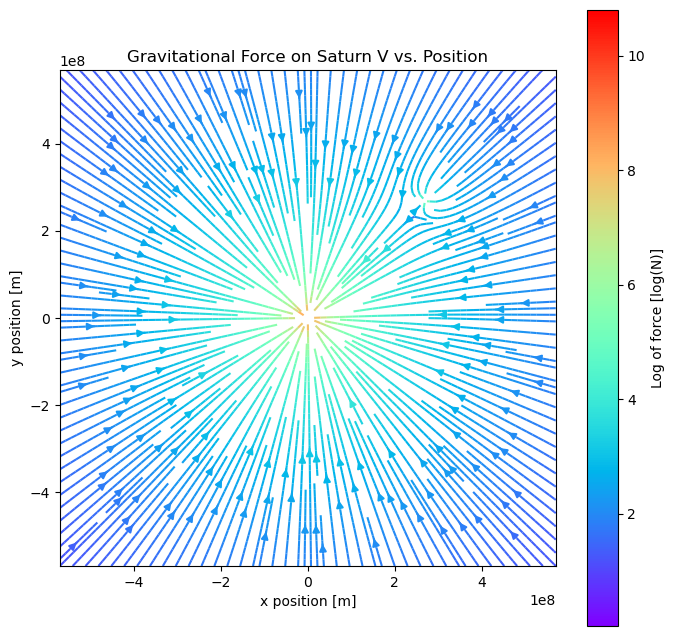

In [46]:
 def force0(m1, m2, xm1, ym1, xm2, ym2, d):
    rvec = np.array([xm2 - xm1, ym2 - ym1])
    r = np.linalg.norm(rvec)
    rhat = (1/r)*rvec

    F = -(G*m1*m2)/(r**2)
          
    fx = F*rhat[0]
    fy = F*rhat[1]
    
    if r < d:
        return np.nan, np.nan
    else:
        return fx, fy
    
force = np.vectorize(force0)

xvals = np.linspace(-1.5*DEM,1.5*DEM,500)
yvals = np.linspace(-1.5*DEM,1.5*DEM,500)
xgrid, ygrid = np.meshgrid(xvals,yvals)

F_earthx = force(m_earth,m_A, 0, 0, xgrid, ygrid,RE)[0]
F_earthy = force(m_earth,m_A, 0, 0, xgrid, ygrid,RE)[1]

F_moonx = force(m_moon,m_A, DEM/np.sqrt(2),DEM/np.sqrt(2),xgrid,ygrid,RM)[0]
F_moony = force(m_moon,m_A, DEM/np.sqrt(2),DEM/np.sqrt(2),xgrid,ygrid,RM)[1]

F_netx = F_earthx + F_moonx
F_nety = F_earthy +F_moony

zvalsx = F_netx
zvalsy = F_nety

fig, ax = plt.subplots(figsize=(8,8))
colors = np.log(np.hypot(zvalsx,zvalsy))
stream = ax.streamplot(xgrid, ygrid, zvalsx, zvalsy, color = colors, cmap = cm.rainbow,density = 2.6);
ax.set_xlabel("x position [m]")
ax.set_ylabel("y position [m]")
ax.set_title("Gravitational Force on Saturn V vs. Position")
cbar = fig.colorbar(stream.lines)
ax.set_aspect("equal")
cbar.set_label("Log of force [log(N)]")

### Part 4: Altitude of the Saturn V Rocket

In [44]:
m0 = 2.8*10**6 # kg
mf = 7.5*10**5 # kg
mdot = 1.3*10**4 # kg/s
ve = 2.4*10**3 # m/s
g = 9.81 # m/s^2

T = (m0 - mf)/mdot
print(f"The burn time of the rocket is {round(T,3)} s")

def deltaV(T0, m00, mf0, mdot0, ve0, g0):
    if T0 > (m00 - mf0)/mdot0:
        return 0
    else:
        dV = ve0*np.log(m00/(m0 - mdot0*T0)) - g0*T0
        return dV

def dvsaturn(x):
    return deltaV(x, m0, mf, mdot, ve, g)
    
h = scipy.integrate.quad(dvsaturn,0,T)

print(f"The height of the rocket at the end of its burn time is {round(h[0]/1000,3)} km")

The burn time of the rocket is 157.692 s
The height of the rocket at the end of its burn time is 74.094 km
